### Regression: Housesales Dataset

This dataset contains historical sales details of all the houses sold between May 2014 to May 2015 in Kings County, Washington State, USA.

Dataset Link: https://www.kaggle.com/swathiachath/kc-housesales-data

Extra Data Dictionary: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g

The aim of this regression is to predict the house sales in King County, Washington State.

In the first part of the project, we work on exploring the dataset to gain insights, view the different trends and also finding any missing value or correlation amoung the 21 features. 

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.getcwd()
os.chdir('C:/Users/Sumukh/Desktop/Sanjana')

Importing the house dataset into a data frame using pandas

In [2]:
house = pd.read_csv('kc_house_data.csv')

Exploring the dataset

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0,...,7,1180.0,0.0,1955,0,98178.0,47.5112,-122.257,NaN,5650.0
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0,...,7,2170.0,400.0,1951,1991,98125.0,47.7210,-122.319,NaN,7639.0
2,5631500400,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0,...,6,770.0,0.0,1933,0,98028.0,47.7379,-122.233,NaN,8062.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,NaN,1.0,0.0,0,...,7,1050.0,910.0,1965,0,98136.0,47.5208,-122.393,NaN,5000.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,NaN,1.0,0.0,0,...,8,1680.0,0.0,1987,0,98074.0,47.6168,-122.045,NaN,7503.0


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21526 non-null float64
bathrooms        21544 non-null float64
sqft_living      21572 non-null float64
sqft_lot         21483 non-null float64
floors           21597 non-null float64
waterfront       21510 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21521 non-null float64
sqft_basement    21367 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21316 non-null float64
lat              21352 non-null float64
long             21352 non-null float64
sqft_living15    21417 non-null float64
sqft_lot15       21579 non-null float64
dtypes: float64(14), int64(6), object(1)
memory usage: 3.5+ MB


In [5]:
print('The dataset contains {} rows and {} columns'.format(house.shape[0],house.shape[1]))
print('The dataset contains {} Categorical features and {} Numerical features'.format(4,17))

The dataset contains 21597 rows and 21 columns
The dataset contains 4 Categorical features and 17 Numerical features


In [6]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21526.000000,21544.000000,21572.000000,2.148300e+04,21597.000000,21510.000000,21597.000000,21597.000000,21597.000000,21521.000000,21367.000000,21597.000000,21597.000000,21316.000000,21352.000000,21352.000000,21417.000000,21579.000000
mean,4.580474e+09,5.402966e+05,3.373270,2.116158,2080.287920,1.510421e+04,1.494096,0.007485,0.234292,3.409825,7.657915,1788.564937,289.867553,1970.999676,84.464787,98078.499156,47.561143,-122.214150,1985.673297,12753.935586
std,2.876736e+09,3.673681e+05,0.926818,0.769219,918.164282,4.148688e+04,0.539683,0.086193,0.766390,0.650546,1.173200,827.966953,441.724304,29.375234,401.821438,53.991122,0.138844,0.140353,684.480004,27271.039053
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469950,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.573450,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.067200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.679700,-122.123000,2360.000000,10080.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Transformation : Mapping or OHE the features

In [8]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

House which has a view to a waterfront, Yes = 1 or No = 0.

In [9]:
house['waterfront'].unique()

array([ 0.,  1., nan])

Given: Has been viewed

Assumption: Number of times house has been viewed, cateforical but not ordinal hence ONE HOT ENCODING is preformed

In [10]:
house['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [11]:
#view = pd.get_dummies(house['view'],prefix= 'view')

Given: How good the condition of the house is (Overall), 1 indicates worn out property and 5 excellent. 

Assumption: 1 as worn out, 2 as decent, 3 as good, 4 as great, 5 as excellent. Since the data is categorical and ordinal, mapping is performed

In [12]:
house['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [13]:
condition = pd.get_dummies(house['condition'],prefix= 'condition',drop_first=True)

Given: Overall grade given to the housing unit, based on King County grading system. Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. 1 poor ,13 excellent.

Assumption: grouping as 1 = minimum/poor (1-3) , 2 = low quality (4-6), 3 = average (7-8), 4 = better/high (9-10) , 5 = excellent (11-13). Since the data is categorical but ordinal, mapping is performed

In [14]:
house['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [15]:
house.loc[house['grade'] == 3, 'grade'] = 1
house.loc[house['grade'] == 4, 'grade'] = 2
house.loc[house['grade'] == 5, 'grade'] = 2
house.loc[house['grade'] == 6, 'grade'] = 2
house.loc[house['grade'] == 7, 'grade'] = 3
house.loc[house['grade'] == 8, 'grade'] = 3
house.loc[house['grade'] == 9, 'grade'] = 4
house.loc[house['grade'] == 10, 'grade'] = 4
house.loc[house['grade'] == 11, 'grade'] = 5
house.loc[house['grade'] == 12, 'grade'] = 5
house.loc[house['grade'] == 13, 'grade'] = 5

In [16]:
grade = pd.get_dummies(house['grade'],prefix= 'grade',drop_first=True)

Concating all the dummies into the dataset

In [17]:
dummies = pd.concat([condition,grade],axis=1)

dummies = dummies.astype('int64')

In [18]:
house = house.drop(columns =['condition','grade'])

In [19]:
house = pd.concat([house,dummies],axis=1)

In [20]:
house.shape

(21597, 27)

Converting this columns into a categorical column representing whether the house under went any renovated or not. Since the '0's are assumed to represent lack of renovation. This conversion can provide valuable insight into how the price of the house varies with the renovation factor

In [21]:
house['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [22]:
house.loc[(house['yr_renovated'] > 0),'yr_renovated']= 1

In [23]:
house.rename(columns = {'yr_renovated':'renovated'}, inplace = True)

In [24]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above',
       'sqft_basement', 'yr_built', 'renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_2', 'grade_3', 'grade_4',
       'grade_5'],
      dtype='object')

Creating a new columns Age (year of sales - year buit), to analysis whether the Age of the house causes the price to vary

In [25]:
house['date'] = pd.to_datetime(house['date']) #converting to datatime
house['year'] = house['date'].dt.year #extracting the year from the date

house['Age'] = house['year']-house['yr_built'] #calculating the age of the house

In [26]:
house.shape

(21597, 29)

In [27]:
house.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                      int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
renovated                 int64
zipcode                 float64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
condition_2               int64
condition_3               int64
condition_4               int64
condition_5               int64
grade_2                   int64
grade_3                   int64
grade_4                   int64
grade_5                   int64
year                      int64
Age                       int64
dtype: object

Check for Missing Value

In [28]:
house.isnull().sum()

id                 0
date               0
price              0
bedrooms          71
bathrooms         53
sqft_living       25
sqft_lot         114
floors             0
waterfront        87
view               0
sqft_above        76
sqft_basement    230
yr_built           0
renovated          0
zipcode          281
lat              245
long             245
sqft_living15    180
sqft_lot15        18
condition_2        0
condition_3        0
condition_4        0
condition_5        0
grade_2            0
grade_3            0
grade_4            0
grade_5            0
year               0
Age                0
dtype: int64

,Total,Percent
zipcode,281,0.013011
long,245,0.011344
lat,245,0.011344
sqft_basement,230,0.010650
sqft_living15,180,0.008334
sqft_lot,114,0.005279
waterfront,87,0.004028
sqft_above,76,0.003519
bedrooms,71,0.003287
bathrooms,53,0.002454


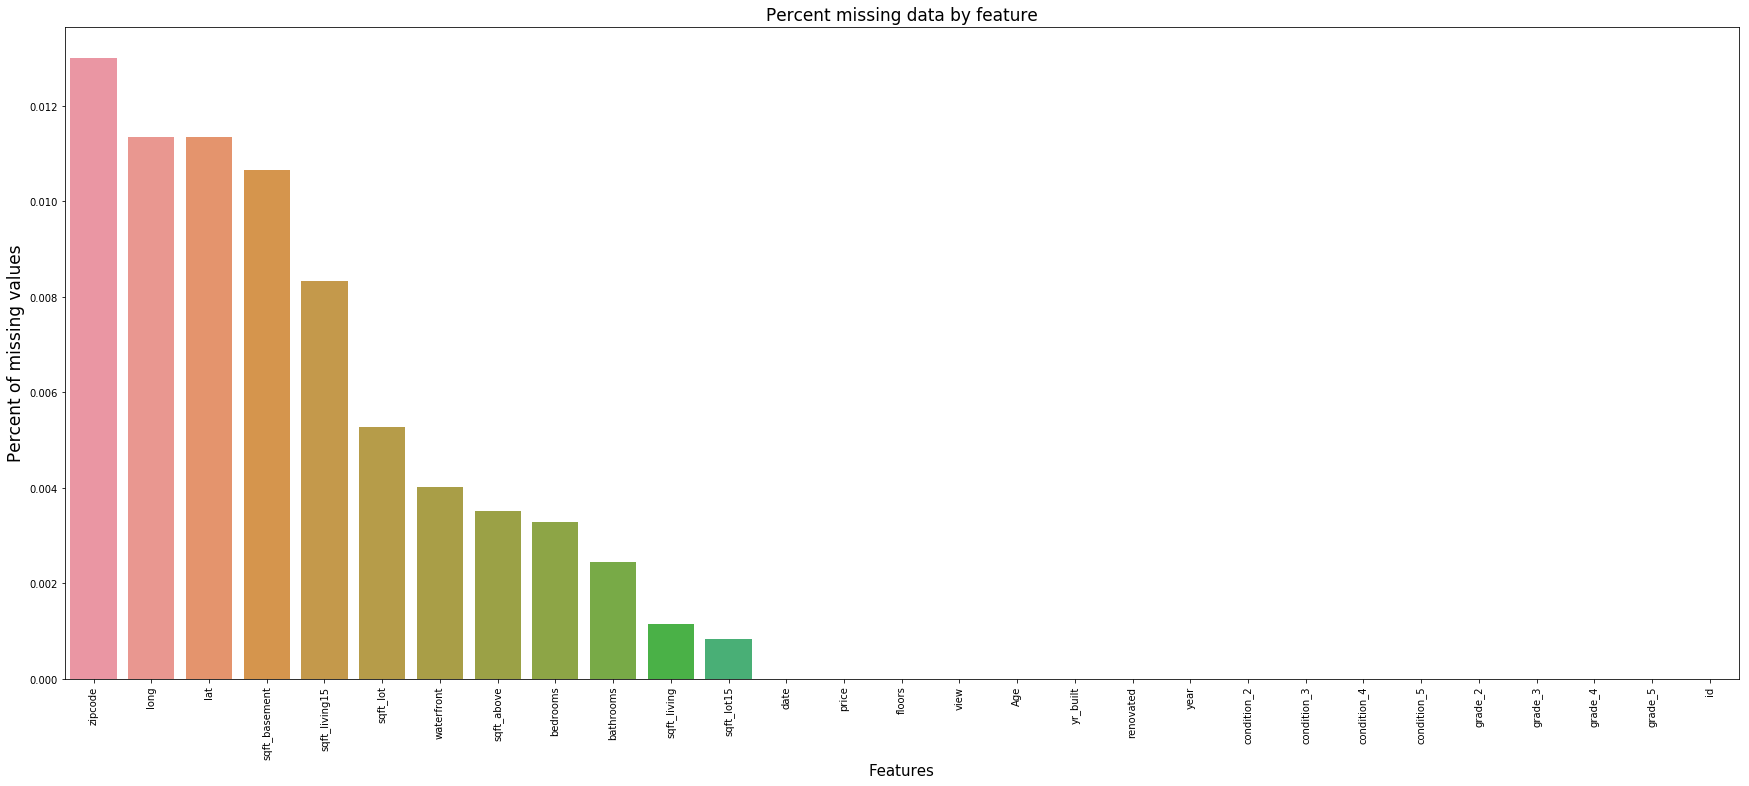

In [29]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(30, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=17)
plt.title('Percent missing data by feature', fontsize=17)

missing_data.head(12)

In [30]:
missing_values = house.isna()
m = missing_values.sum().sum()
percentofmissing = (m/len(house))*100
print('The percentage of missing value in the dataset is: {:.0f}%'.format(percentofmissing))

The percentage of missing value in the dataset is: 8%


Dropping columns are considered to be insignificant and can produce meaningless information when added to a model

1. zipcode, lat, long are categorical variables that represent location but are too large in categories to bin/reassign to get meaningful insights, hence are dropped. 

2. Date, yr_buit are dropped since valuable insights that these columns have to offer, are inferred from the Age column that has been added as a feature (sales date - year built = Age of the house)

3. ID is dropped since it's insignficant for the business problem

In [31]:
house = house.drop(columns=['id','date','yr_built','zipcode','lat','long'])

In [32]:
house.shape

(21597, 23)

In [33]:
house.isnull().sum()

price              0
bedrooms          71
bathrooms         53
sqft_living       25
sqft_lot         114
floors             0
waterfront        87
view               0
sqft_above        76
sqft_basement    230
renovated          0
sqft_living15    180
sqft_lot15        18
condition_2        0
condition_3        0
condition_4        0
condition_5        0
grade_2            0
grade_3            0
grade_4            0
grade_5            0
year               0
Age                0
dtype: int64

In [34]:
house.bedrooms.describe()

count    21526.000000
mean         3.373270
std          0.926818
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [35]:
house.bedrooms.unique()

array([ 3.,  2.,  4.,  5., nan,  1.,  6.,  7.,  8.,  9., 11., 10., 33.])

Since bedroom seems to have large outliers, missing values are imputed using median

In [36]:
house['bedrooms'].fillna(house['bedrooms'].median(), inplace=True)

In [37]:
h1 = house.groupby('bedrooms')

In [38]:
h1.first()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,renovated,...,condition_2,condition_3,condition_4,condition_5,grade_2,grade_3,grade_4,grade_5,year,Age
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.0,350000.0,1.00,700.0,5100.0,1.0,0.0,0,700.0,0.0,0,...,0,1,0,0,0,1,0,0,2014,72
2.0,180000.0,1.00,770.0,10000.0,1.0,0.0,0,770.0,0.0,0,...,0,1,0,0,1,0,0,0,2015,82
3.0,221900.0,1.00,1180.0,5650.0,1.0,0.0,0,1180.0,0.0,0,...,0,1,0,0,0,1,0,0,2014,59
4.0,604000.0,3.00,1960.0,8075.0,1.0,0.0,0,1050.0,910.0,0,...,0,0,0,1,0,1,0,0,2014,49
5.0,530000.0,2.00,1810.0,5639.0,1.5,0.0,0,1600.0,0.0,0,...,0,1,0,0,0,1,0,0,2015,115
6.0,464000.0,3.00,2300.0,3404.0,2.0,0.0,0,1600.0,700.0,1,...,0,1,0,0,0,1,0,0,2014,94
7.0,1950000.0,3.50,4640.0,15235.0,2.0,0.0,1,1690.0,0.0,1,...,0,1,0,0,0,0,0,1,2014,49
8.0,490000.0,5.00,2800.0,2580.0,2.0,0.0,0,1880.0,920.0,0,...,0,1,0,0,0,1,0,0,2014,17
9.0,599999.0,4.50,3830.0,6988.0,2.5,0.0,0,2450.0,1380.0,0,...,0,1,0,0,0,1,0,0,2014,76


Bathrooms refers to the number of bathrooms per bedrooms. Hence using grouping by the bedrooms, the bathrooms filing values are imputed

In [39]:
house['bathrooms'] = house.groupby(['bedrooms'])['bathrooms'].transform( lambda x:x.fillna(x.mean()))

In [40]:
house['sqft_living'].describe()

count    21572.000000
mean      2080.287920
std        918.164282
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

The data is skewed hence missing values are imputed using median of sqft_living

In [41]:
house['sqft_living'].fillna(house['sqft_living'].median(), inplace=True)

In [42]:
house['sqft_lot'].describe()

count    2.148300e+04
mean     1.510421e+04
std      4.148688e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.616000e+03
75%      1.067200e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

The data is skewed hence missing values are imputed using median of sqft_lot

In [43]:
house['sqft_lot'].fillna(house['sqft_lot'].median(), inplace=True)

In [44]:
house['waterfront'] = house['waterfront'].fillna(house['waterfront'].mode().iloc[0])

In [45]:
house['sqft_above'].describe()

count    21521.000000
mean      1788.564937
std        827.966953
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [46]:
core = house[['bedrooms','bathrooms','sqft_above','sqft_living']]
core.corr()

,bedrooms,bathrooms,sqft_above,sqft_living
bedrooms,1.000000,0.514785,0.479070,0.577387
bathrooms,0.514785,1.000000,0.686391,0.755048
sqft_above,0.479070,0.686391,1.000000,0.876182
sqft_living,0.577387,0.755048,0.876182,1.000000


sqft_above is the total square footage of house apart from the basement. As seen above sqft_above is highly correlated to sqft_living. Hence, imputing missing values in sqft_above by grouping by sqft_living

In [47]:
house['sqft_above'] = house.groupby(['sqft_living'])['sqft_above'].transform( lambda x:x.fillna(x.mean()))

In [48]:
house['sqft_basement'].describe()

count    21367.000000
mean       289.867553
std        441.724304
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

50% of sqft_basement has 0's which represent lack of a basement for the house, therefore imputing values by mean or median might not give appropriate results

In [49]:
(house['sqft_basement']==0).value_counts()

True     13023
False     8574
Name: sqft_basement, dtype: int64

Creating a columns which indicates whether the house has a basement or not and then imputing using mode

In [50]:
house.loc[(house['sqft_basement'] > 0),'sqft_basement']= 1

In [51]:
house.rename(columns = {'sqft_basement':'basement'}, inplace = True)

In [52]:
house['basement'] = house['basement'].fillna(house['basement'].mode().iloc[0])

In [53]:
house['sqft_living15'].describe()

count    21417.000000
mean      1985.673297
std        684.480004
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

In [54]:
house['sqft_living15'].fillna(house['sqft_living15'].mean(), inplace=True)

In [55]:
house['sqft_lot15'].fillna(house['sqft_lot15'].mean(), inplace=True)
house['sqft_above'].fillna(house['sqft_above'].mean(), inplace=True)

In [56]:
house.isnull().sum().sum()

0

In [57]:
house.Age.unique()

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1],
      dtype=int64)

Dropping rows where the age is seem to be less than or equal to 0

In [58]:
indexNames = house[house['Age'] <= 0 ].index
 
# Delete these row indexes from dataFrame
house.drop(indexNames , inplace=True)

In [59]:
house.shape

(21155, 23)

Checking for correlation

In [60]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'basement', 'renovated',
       'sqft_living15', 'sqft_lot15', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_2', 'grade_3', 'grade_4',
       'grade_5', 'year', 'Age'],
      dtype='object')

In [61]:
#checking for correlation between all the numerical feature variables
core = house[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15','Age']]

# Create correlation matrix
corr_matrix = core.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print('Features to be dropped: {}'.format(to_drop))

Features to be dropped: ['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15']


In [62]:
core.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,Age
price,1.000000,0.305916,0.523233,0.701032,0.091367,0.255304,0.605020,0.584504,0.084648,-0.043368
bedrooms,0.305916,1.000000,0.511535,0.573046,0.034142,0.176670,0.472222,0.387169,0.032197,-0.148685
bathrooms,0.523233,0.511535,1.000000,0.753973,0.092342,0.500760,0.684120,0.566393,0.092764,-0.499958
sqft_living,0.701032,0.573046,0.753973,1.000000,0.177126,0.354682,0.874201,0.751443,0.188539,-0.311888
sqft_lot,0.091367,0.034142,0.092342,0.177126,1.000000,0.001805,0.189643,0.147339,0.717645,-0.061365
floors,0.255304,0.176670,0.500760,0.354682,0.001805,1.000000,0.526852,0.283219,-0.003797,-0.473248
sqft_above,0.605020,0.472222,0.684120,0.874201,0.189643,0.526852,1.000000,0.727380,0.201256,-0.416528
sqft_living15,0.584504,0.387169,0.566393,0.751443,0.147339,0.283219,0.727380,1.000000,0.186628,-0.324519
sqft_lot15,0.084648,0.032197,0.092764,0.188539,0.717645,-0.003797,0.201256,0.186628,1.000000,-0.080451
Age,-0.043368,-0.148685,-0.499958,-0.311888,-0.061365,-0.473248,-0.416528,-0.324519,-0.080451,1.000000


- price is more correlated with sqft_living than sqft_above, sqft_above is dropped
- sqft_living15 is dropped since it is highly correlated to sqft_living and less correlated to price in comparision
- sqft_lot15 is dropped cause it's highly correlated to sqft_lot and very less correlated to price in comparision

In [63]:
house = house.drop(columns = ['sqft_above', 'sqft_living15', 'sqft_lot15'])

In [64]:
house.shape

(21155, 20)

In [65]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'basement', 'renovated', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_2', 'grade_3',
       'grade_4', 'grade_5', 'year', 'Age'],
      dtype='object')

Splitting the dataset into train and test

In [66]:
X = house.drop(columns = ['price','year'],axis=1)
Y = house['price']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)

In [68]:
print ('X_train shape is : ', X_train.shape)
print('X_test shape is : ', X_test.shape)
print('Y_train shape is : ', Y_train.shape)
print('Y_test shape is : ', Y_test.shape)

X_train shape is :  (16924, 18)
X_test shape is :  (4231, 18)
Y_train shape is :  (16924,)
Y_test shape is :  (4231,)


Scaling 

Min-Max scaling is the chosen scaling type since it will help in reducing the standard deviation and consequently outliers by converting the dataset with values between 0 and 1. Also since the dataset contains data measured in different units, MinMaxScaler will help the model give equal weightage

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### LINEAR REGRESSION

In [70]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_scaled, Y_train)
print(lreg.score(X_train_scaled, Y_train))
print(lreg.score(X_test_scaled, Y_test))

0.649739358014843
0.6522887708892378


In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lreg, X_train_scaled, Y_train, cv = 10)
print('The scores are {}'.format((scores).mean()))

The scores are 0.6461318840816255


In [72]:
lrpred = lreg.predict(X_test_scaled)

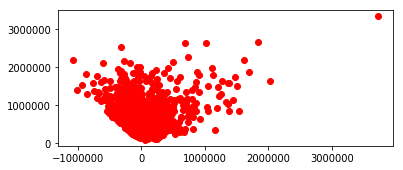

In [73]:
pred_val = lrpred
true_val = Y_test
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
plt.scatter(residual,pred_val,color='r')

0.8202366924546486

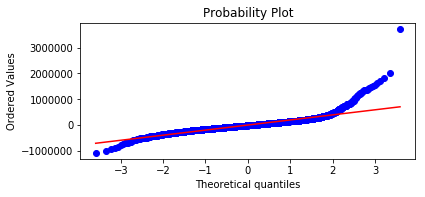

In [74]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

### RIDGE REGRESSION

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
para = {'alpha':[0.001, 0.01, 0.1, 1, 5, 10]}

grid_search = GridSearchCV(ridge, para, cv = 5)
grid_search.fit(X_train_scaled, Y_train)

print('The best hyperparameter value from grid search: {}'.format(grid_search.best_params_))
print('The best train score: {:.2f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search: {'alpha': 0.1}
The best train score: 0.65


In [76]:
ridge.fit(X_train_scaled, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

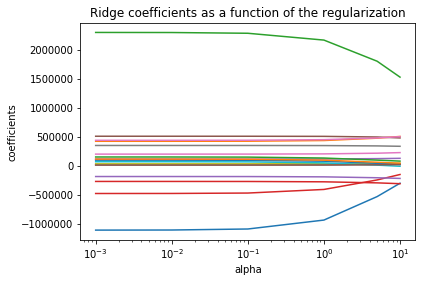

train:[0.6497393577566629, 0.6497393322512706, 0.6497368350787667, 0.6495318940676811, 0.6470537224663337, 0.6435751486757735]
test:[0.6522883637706602, 0.6522846810894274, 0.6522460577983783, 0.651718636915208, 0.6482901288774454, 0.6440668254615097]


In [77]:
x_range = [0.001, 0.01, 0.1, 1, 5, 10]
train_score_list = []
test_score_list = []
coefs=[]

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_scaled, Y_train)
    train_score_list.append(ridge.score(X_train_scaled, Y_train))
    test_score_list.append(ridge.score(X_test_scaled, Y_test))
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(x_range, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show() #coeff vs alpha values
print('train:{}'.format(train_score_list))
print('test:{}'.format(test_score_list))

In [78]:
regr_cv = Ridge(alpha=1)
regr_cv.fit(X_train_scaled, Y_train)
print(ridge.score(X_train_scaled, Y_train))
print(ridge.score(X_test_scaled, Y_test))

0.6435751486757735
0.6440668254615097


In [79]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr_cv, X_train_scaled, Y_train, cv = 5)
print('The scores are {}'.format((scores).mean()))

The scores are 0.6480697370014725


In [80]:
Ridge_pred = regr_cv.predict(X_test_scaled)

### LASSO REGRESSION

In [81]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter = 100000)
param = {'alpha':[1, 5, 10, 15, 20, 100]}

grid_search = GridSearchCV(lasso, param, cv = 5)
grid_search.fit(X_train_scaled, Y_train)

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.3f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'alpha': 1}
The best train score:0.648


In [82]:
lasso.fit(X_train_scaled, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

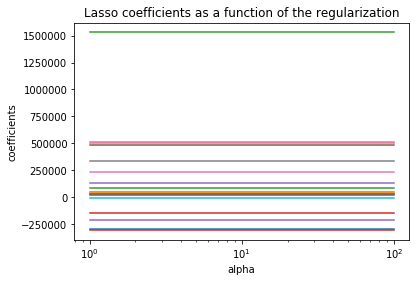

train:[0.649739215223935, 0.6497357890012116, 0.6497250858881881, 0.6497072542020934, 0.6496822963595736, 0.649219822099715]
test:[0.6523104598657037, 0.6523521157529062, 0.6523957428492252, 0.6524299989988687, 0.652454901489463, 0.6516507201245039]


In [130]:
x_range = [1, 5, 10, 15, 20, 100]
train_score_list = []
test_score_list = []
coefs=[]

for alpha in x_range: 
    lasso = Lasso(alpha,max_iter = 100000)
    lasso.fit(X_train_scaled, Y_train)
    train_score_list.append(lasso.score(X_train_scaled, Y_train))
    test_score_list.append(lasso.score(X_test_scaled, Y_test))
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(x_range, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show() #coeff vs alpha values
print('train:{}'.format(train_score_list))
print('test:{}'.format(test_score_list))

In [84]:
lasso = Lasso(alpha = 1, random_state = 0, max_iter = 10000)
lasso.fit(X_train_scaled, Y_train)
print(lasso.score(X_train_scaled, Y_train))
print(lasso.score(X_test_scaled, Y_test))

0.649739215223935
0.6523104598657037


In [85]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lasso, X_train_scaled, Y_train, cv = 5)
print('The scores are {}'.format((scores).mean()))

The scores are 0.6482499628769766


In [86]:
Lasso_pred = lasso.predict(X_test_scaled)

### POLYNOMIAL REGRESSION

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [88]:
lreg.fit(X_train_poly, Y_train)
lreg.predict(X_test_poly)

print(lreg.score(X_train_poly, Y_train))
print(lreg.score(X_test_poly, Y_test))

0.7123144612260555
0.7075546381875022


In [89]:
Poly_pred = lreg.predict(X_test_poly)

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lreg, X_train_poly, Y_train, cv = 5)
print('The scores are {}'.format((scores).mean()))

The scores are 0.6801803737848484


### Support Vector Machines

In [122]:
from sklearn.svm import SVR

svrlr = SVR(kernel = 'linear')
param = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
grid_search = GridSearchCV(svrlr, param, cv = 4)
grid_search.fit(X_train_scaled, Y_train)

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.3f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'C': 100, 'gamma': 0.001}
The best train score:0.188


In [126]:
svrlr = SVR(kernel ='linear', C=100,gamma= 0.001)
svrlr.fit(X_train_scaled, Y_train)

print(svrlr.score(X_train_scaled, Y_train))
print(svrlr.score(X_test_scaled, Y_test))

0.22672151259136486
0.21797423422854856


In [127]:
svr_lr = svrlr.predict(X_test_scaled)

In [121]:
from sklearn.svm import SVR

svrkernel = SVR(kernel = 'rbf')
param = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svrkernel, param, cv = 2)
grid_search.fit(X_train_scaled, Y_train)

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.3f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'C': 100, 'gamma': 0.5}
The best train score:0.018


In [128]:
svrkernel = SVR(kernel ='rbf', C=100,gamma= 0.5)

svrkernel.fit(X_train_scaled, Y_train)

print(svrkernel.score(X_train_scaled, Y_train))
print(svrkernel.score(X_test_scaled, Y_test))

0.06858840715927705
0.06609687380778417


In [129]:
svr_k = svrkernel.predict(X_test_scaled)

### KNN Regressor

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

knnreg = KNeighborsRegressor()
param = {'n_neighbors':[2,3,5,10,15,20]}

grid_search = GridSearchCV(knnreg, param, cv = 5)
grid_search.fit(X_train_scaled, Y_train)

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.3f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'n_neighbors': 10}
The best train score:0.625


train:[0.7453429363169565, 0.7020182337902212, 0.6784420135704541, 0.6653070733428825]
test:[0.6336712028184355, 0.6472452821760957, 0.6426861306190581, 0.6384451127899917]


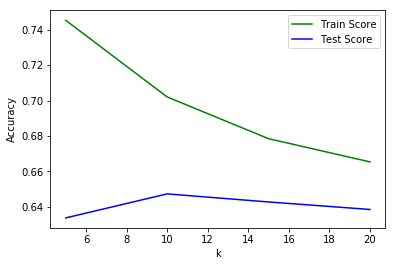

In [97]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

train_score_array = []
test_score_array = []
y =  [5, 10, 15, 20]

for k in y:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_scaled, Y_train)
    train_score_array.append(knn.score(X_train_scaled, Y_train))
    test_score_array.append(knn.score(X_test_scaled, Y_test))

print('train:{}'.format(train_score_array))
print('test:{}'.format(test_score_array))

x_axis = y
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [98]:
knnreg = KNeighborsRegressor(10)
knnreg.fit(X_train_scaled, Y_train)

print(knnreg.score(X_train_scaled, Y_train))
print(knnreg.score(X_test_scaled, Y_test))

0.7020182337902212
0.6472452821760957


In [100]:
knn_pred = knnreg.predict(X_test_scaled)

### DECISION TREE

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()

param = {'max_depth': [1,3,5,7,9,10]}

grid_search = GridSearchCV(regressor, param, cv = 5)
grid_search.fit(X_train_scaled, Y_train)   

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.3f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'max_depth': 7}
The best train score:0.626


In [109]:
regressor = DecisionTreeRegressor(max_depth = 7)
regressor.fit(X_train_scaled, Y_train)

print(regressor.score(X_train_scaled, Y_train))
print(regressor.score(X_test_scaled, Y_test))

0.7200922105753709
0.6708055271096638


In [110]:
DT_pred = regressor.predict(X_test_scaled)

### RANDOM FOREST REGRESSOR

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RF_regressor = RandomForestRegressor()

param = {'max_depth': [1,3,5,7,9,10],'n_estimators' : [10,50,100]}

grid_search = GridSearchCV(RF_regressor, param, cv = 5)
grid_search.fit(X_train_scaled, Y_train)   

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.3f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'max_depth': 9, 'n_estimators': 50}
The best train score:0.697


In [113]:
RT_regressor = RandomForestRegressor(max_depth = 9,n_estimators = 50)
RT_regressor.fit(X_train_scaled, Y_train)

print(RT_regressor.score(X_train_scaled, Y_train))
print(RT_regressor.score(X_test_scaled, Y_test))

0.7986795084898901
0.7122710091241442


In [117]:
RT = RT_regressor.predict(X_test_scaled)

### CONCULSION

Linear Regression:
train: 0.65
test: 0.65
The cross validation scores are 0.65


Ridge Regression:
Grid Search: The best train score: 0.65
The cross validation scores are 0.65
train: 0.64
test: 0.64

    
Lasso Regression:
Grid Search: The best train score:0.65
The cross validation scores are 0.65
train: 0.65
test: 0.65

    
Polynomial Regression:
The Cross validation scores are 0.68
train: 0.71
test: 0.70

    
Support Vector Regressor: Linear
Grid Search: The best train score:0.19
train: 0.23
test: 0.22

    
Support Vector Regressor: Kernel
Grid Search: The best train score:0.018
train: 0.068
test: 0.066

    
KNN Regressor:
Grid Search: The best train score:0.63
train: 0.70
test: 0.65

    
Decision Tree:
Grid Search: The best train score:0.63
train: 0.72
test: 0.67


Random Tree:
Grid Search: The best train score:0.70
train: 0.80
test: 0.71


##### Viewing the best train and test score of all the models, polynomial regression with degree = 2 is seen to be the best performing regressor.

Running the model with the best parameters and all features

In [134]:
Poly_pred #predicted values for polynomial regression

array([ 416668.0248527 ,  342621.53192457,  488920.6318558 , ...,
        667673.55464704, 1107718.23195601, 1197079.49933298])

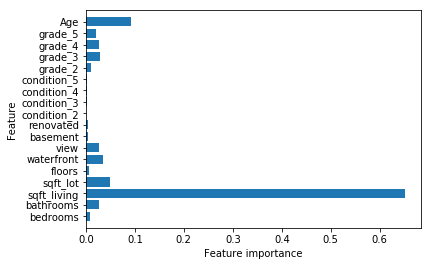

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_feature_importances_cancer(model):
    n_features = X_train_scaled.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)

Running the model with the best parameters and features

In [ ]:
X_train = X_train.drop(columns=['condition_2','condition_3','condition_4','condition_5','basement'])
X_test = X_test.drop(columns=['condition_2','condition_3','condition_4','condition_5','basement'])

In [139]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lreg.fit(X_train_poly, Y_train)

print(lreg.score(X_train_poly, Y_train))
print(lreg.score(X_test_poly, Y_test))

Poly_pred = lreg.predict(X_test_poly)

0.7038200639857777
0.7049040963016517


In [140]:
Poly_pred

array([ 421086.02682213,  333488.80153216,  505986.31259678, ...,
        702722.89924516, 1163825.12502731, 1161021.46320033])

## Bagging and Pasting

#### Linear Regression with Bagging

In [317]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
bag_lr= BaggingRegressor(lr, max_samples = 100, random_state = 10, bootstrap=True)
bag_lr.fit(X_train_scaled, y_train)

print('Linear Regression with Bagging')
print('Training score : {:.2f}'.format(bag_lr.score(X_train_scaled, y_train)))
print('Test score     : {:.2f}\n'.format(bag_lr.score(X_test_scaled, y_test)))

Linear Regression with Bagging
Training score : 0.64
Test score     : 0.62



In [363]:
bag_o = BaggingRegressor(lr, max_samples = 100, random_state = 10, bootstrap=True, oob_score=True)

bag_o.fit(X_train_scaled, y_train)
print('out-of-bag evaluation : {:.2f}'.format(bag_o.oob_score_))

out-of-bag evaluation : 0.62


#### Linear Regression with Pasting

In [333]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
pas_lr= BaggingRegressor(lr, max_samples = 100, random_state = 10, bootstrap=False)
pas_lr.fit(X_train_scaled, y_train)

print('Linear Regression with Pasting')
print('Training score : {:.2f}'.format(pas_lr.score(X_train_scaled, y_train)))
print('Test score     : {:.2f}\n'.format(pas_lr.score(X_test_scaled, y_test)))

Linear Regression with Pasting
Training score : 0.64
Test score     : 0.62



#### Ridge Regression with Bagging

In [77]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
bag_ridge= BaggingRegressor(ridge, max_samples = 100, random_state = 10, bootstrap=True)
bag_ridge.fit(X_train_scaled, y_train)

print('Ridge Regression with Bagging')
print('Training score : {:.2f}'.format(bag_ridge.score(X_train_scaled, y_train)))
print('Test score     : {:.2f}\n'.format(bag_ridge.score(X_test_scaled, y_test)))

Ridge Regression with Bagging
Training score : 0.59
Test score     : 0.59



In [362]:
bag_or = BaggingRegressor(ridge, max_samples = 100, random_state = 10, bootstrap=True, oob_score=True)

bag_or.fit(X_train_scaled, y_train)
print('out-of-bag evaluation : {:.2f}'.format(bag_or.oob_score_))

out-of-bag evaluation : 0.58


#### Ridge Regression with Pasting

In [332]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
pas_ridge= BaggingRegressor(ridge, max_samples = 100, random_state = 10, bootstrap=False)
pas_ridge.fit(X_train_scaled, y_train)

print('Ridge Regression with Pasting')
print('Training score : {:.2f}'.format(pas_ridge.score(X_train_scaled, y_train)))
print('Test score     : {:.2f}\n'.format(pas_ridge.score(X_test_scaled, y_test)))

Ridge Regression with Pasting
Training score : 0.59
Test score     : 0.55



## Adaboost Boosting

In [78]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

AB = AdaBoostRegressor()
param = {'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1],'n_estimators': [50,100,150,200,250,300]}

grid_search = GridSearchCV(AB, param, cv = 5)
grid_search.fit(X_train_scaled, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'learning_rate': 0.1, 'n_estimators': 50}
Best score 0.58


In [82]:
ada = AdaBoostRegressor(learning_rate= 0.1,n_estimators = 50,random_state=10)
ada.fit(X_train_scaled, y_train)

print('Training score with AdaBoost: {:.2f}'.format(ada.score(X_train_scaled, y_train)))
print('Test score with AdaBoost: {:.2f}'.format(ada.score(X_test_scaled, y_test)))

Training score with AdaBoost: 0.62
Test score with AdaBoost: 0.52


#### Lasso with AdaBoost Boosting

In [83]:
from sklearn.linear_model import Lasso

las1 = Lasso(max_iter = 100000, alpha = 1)

ada_las = AdaBoostRegressor(las1,learning_rate= 0.1,n_estimators = 50,random_state=10)
ada_las.fit(X_train_scaled, y_train)

print('Lasso Regression with AdaBoost')
print('Training score : {:.2f}'.format(ada_las.score(X_train_scaled, y_train)))
print('Test score     : {:.2f}'.format(ada_las.score(X_test_scaled, y_test)))

Lasso Regression with AdaBoost
Training score : 0.54
Test score     : 0.42


#### KNN with AdaBoost Boosting

In [84]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(10)

ada_knn = AdaBoostRegressor(knnreg,learning_rate= 0.1,n_estimators = 50,random_state=10)
ada_knn.fit(X_train_scaled, y_train)

print('K- Nearest Neigbhor with AdaBoost')
print('Training score : {:.2f}'.format(ada_knn.score(X_train_scaled, y_train)))
print('Test score     : {:.2f}'.format(ada_knn.score(X_test_scaled, y_test)))

K- Nearest Neigbhor with AdaBoost
Training score : 0.80
Test score     : 0.53


#### Decision Tress with AdaBoosting

In [320]:
regressor = DecisionTreeRegressor()

model2 = AdaBoostRegressor(regressor,learning_rate= 0.1,n_estimators = 50,random_state=10)
model2.fit(X_train_scaled, y_train)
model2.score(X_test_scaled,y_test)
print('Training score : {:.2f}'.format(model2.score(X_train_scaled, y_train)))
print('Test score     : {:.2f}\n'.format(model2.score(X_test_scaled, y_test)))

Training score : 1.00
Test score     : 0.64



## Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

Grad = GradientBoostingRegressor(random_state = 10)
param_grid = {'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1],'max_depth': range(1,11),'n_estimators': [10,20,50,100]}

grid_search = GridSearchCV(Grad, param_grid, cv = 2)
grid_search.fit(X_train_scaled, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score 0.69


In [330]:
boost = GradientBoostingRegressor(learning_rate= 0.1,max_depth= 3,n_estimators= 100)
boost.fit(X_train_scaled, y_train)

print('Training score : {:.2f}'.format(boost.score(X_train_scaled, y_train)))
print('Test score     : {:.2f}'.format(boost.score(X_test_scaled, y_test)))

Training score : 0.75
Test score     : 0.69


## PCA

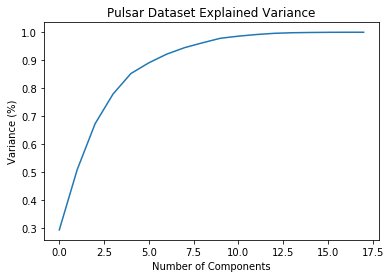

In [73]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

X_train_P = pca.fit_transform(X_train_scaled)
X_test_P = pca.transform(X_test_scaled)

print(pca.n_components_)

9


### LINEAR REGRESSION

In [94]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_P, y_train)

print('Linear Regression after PCA')
print('Training score : {:.2f}'.format(lreg.score(X_train_P, y_train)))
print('Test score     : {:.2f}'.format(lreg.score(X_test_P, y_test)))

Linear Regression after PCA
Training score : 0.50
Test score     : 0.49


In [95]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lreg, X_train_P, y_train, cv = 10)
print('The score is: {:.2f}'.format((scores).mean()))

The score is: 0.50


In [96]:
lrpred = lreg.predict(X_test_P)

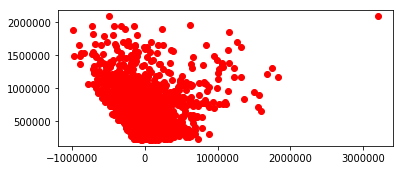

In [97]:
pred_val = lrpred
true_val = y_test
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
plt.scatter(residual,pred_val,color='r')

0.8816756920389045

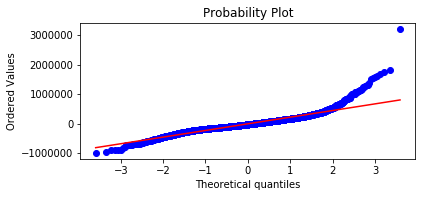

In [98]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

### RIDGE REGRESSION

In [99]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
para = {'alpha':[0.001, 0.01, 0.1, 1, 5, 10]}

grid_search = GridSearchCV(ridge, para, cv = 5)
grid_search.fit(X_train_P, y_train)

print('The best hyperparameter value from grid search: {}'.format(grid_search.best_params_))
print('The best train score: {:.2f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search: {'alpha': 5}
The best train score: 0.50


In [100]:
ridge.fit(X_train_P, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

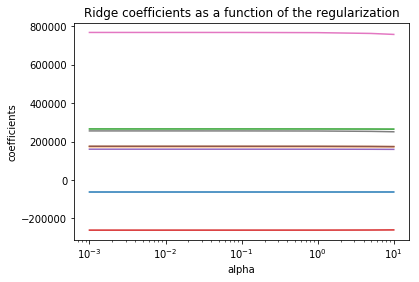

train:[0.5034225651218487, 0.5034225650793509, 0.503422560830608, 0.503422136983852, 0.5034119747828285, 0.5033807588745227]
test:[0.4896241132361956, 0.48962539117066717, 0.48963816400063787, 0.48976524235262026, 0.49031590372620293, 0.49097252780309086]


In [101]:
x_range = [0.001, 0.01, 0.1, 1, 5, 10]
train_score_list = []
test_score_list = []
coefs=[]

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_P, y_train)
    train_score_list.append(ridge.score(X_train_P, y_train))
    test_score_list.append(ridge.score(X_test_P, y_test))
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(x_range, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show() #coeff vs alpha values
print('train:{}'.format(train_score_list))
print('test:{}'.format(test_score_list))

In [118]:
regr_cv = Ridge(alpha=5)
regr_cv.fit(X_train_P, y_train)

print('Ridge Regression after PCA')
print('Training score : {:.2f}'.format(regr_cv.score(X_train_P, y_train)))
print('Test score     : {:.2f}'.format(regr_cv.score(X_test_P, y_test)))

Ridge Regression after PCA
Training score : 0.50
Test score     : 0.49


In [119]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr_cv, X_train_P, y_train, cv = 5)
print('The score is {:.2f}'.format((scores).mean()))

The score is 0.50


In [104]:
Ridge_pred = regr_cv.predict(X_test_P)

### LASSO REGRESSION

In [105]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter = 100000)
param = {'alpha':[1, 5, 10, 15, 20, 100]}

grid_search = GridSearchCV(lasso, param, cv = 5)
grid_search.fit(X_train_P, y_train)

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.2f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'alpha': 100}
The best train score:0.50


In [106]:
lasso.fit(X_train_P, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

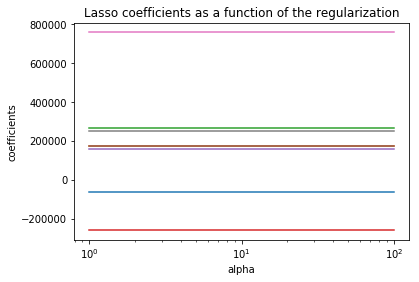

train:[0.5034225644259815, 0.5034225477148673, 0.5034224954926353, 0.5034224084555821, 0.5034222866037074, 0.5034156021580121]
test:[0.4896277821772038, 0.4896430088896452, 0.4896620039138232, 0.4896809563086973, 0.48969986607426746, 0.4899966247380484]


In [107]:
x_range = [1, 5, 10, 15, 20, 100]
train_score_list = []
test_score_list = []
coefs=[]

for alpha in x_range: 
    lasso = Lasso(alpha,max_iter = 100000)
    lasso.fit(X_train_P, y_train)
    train_score_list.append(lasso.score(X_train_P, y_train))
    test_score_list.append(lasso.score(X_test_P, y_test))
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(x_range, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show() #coeff vs alpha values
print('train:{}'.format(train_score_list))
print('test:{}'.format(test_score_list))

In [122]:
lasso = Lasso(alpha = 100, random_state = 0, max_iter = 10000)
lasso.fit(X_train_P, y_train)
print('Lasso Regression after PCA')
print('Training score : {:.2f}'.format(lasso.score(X_train_P, y_train)))
print('Test score     : {:.2f}'.format(lasso.score(X_test_P, y_test)))

Lasso Regression after PCA
Training score : 0.50
Test score     : 0.49


In [164]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lasso, X_train_P, y_train, cv = 5)
print('The scores are {:.2f}'.format((scores).mean()))

The scores are 0.50


In [110]:
Lasso_pred = lasso.predict(X_test_P)

### POLYNOMIAL REGRESSION

In [166]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [112]:
lreg.fit(X_train_poly, y_train)
lreg.predict(X_test_poly)

print('Polynomial Regression after PCA')
print('Training score : {:.2f}'.format(lreg.score(X_train_poly, y_train)))
print('Test score     : {:.2f}'.format(lreg.score(X_test_poly, y_test)))

Polynomial Regression after PCA
Training score : 0.72
Test score     : 0.67


In [113]:
Poly_pred = lreg.predict(X_test_poly)

In [114]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lreg, X_train_poly, y_train, cv = 5)
print('The score is {:.2f}'.format((scores).mean()))

The score is 0.67


### Support Vector Machines

### svr - linear

In [148]:
from sklearn.svm import SVR

svrlr = SVR(kernel = 'linear')
param = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}
grid_search = GridSearchCV(svrlr, param, cv = 4)
grid_search.fit(X_train_P, y_train)

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.2f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'C': 100, 'gamma': 0.001}
The best train score:0.17


In [149]:
svrlr = SVR(kernel ='linear', C=100,gamma= 0.001)
svrlr.fit(X_train_P, y_train)

print('SVR Linear after PCA')
print('Training score: {:.2f}'.format(svrlr.score(X_train_P, y_train)))
print('Test score: {:.2f}'.format(svrlr.score(X_test_P, y_test)))

SVR Linear after PCA
Training score: 0.21
Test score: 0.23


In [150]:
svr_lr = svrlr.predict(X_test_P)

#### svr - poly

In [75]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svrpl = SVR(kernel = 'poly')
param = {'C':[ 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50], 
              'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]}
grid_search = GridSearchCV(svrpl, param, cv = 2)
grid_search.fit(X_train_P, y_train)

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.2f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'C': 50, 'gamma': 50}
The best train score:0.60


In [76]:
svrpl = SVR(kernel ='poly', C=50,gamma= 50)
svrpl.fit(X_train_P, y_train)

print('SVR Poly after PCA')
print('Training score: {:.2f}'.format(svrpl.score(X_train_P, y_train)))
print('Test score: {:.2f}'.format(svrpl.score(X_test_P, y_test)))

SVR Poly after PCA
Training score: 0.65
Test score: 0.64


### svr - rbf

In [151]:
from sklearn.svm import SVR

svrkernel = SVR(kernel = 'rbf')
param = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svrkernel, param, cv = 2)
grid_search.fit(X_train_P, y_train)

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.2f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'C': 100, 'gamma': 0.5}
The best train score:0.02


In [152]:
svrkernel = SVR(kernel ='rbf', C=100,gamma= 0.5)

svrkernel.fit(X_train_P, y_train)

print('SVR rbf after PCA')
print('Training score: {:.2f}'.format(svrkernel.score(X_train_P, y_train)))
print('Test score:     {:.2f}'.format(svrkernel.score(X_test_P, y_test)))

SVR rbf after PCA
Training score: 0.07
Test score:     0.09


In [153]:
svr_k = svrkernel.predict(X_test_P)

### KNN Regressor

In [154]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

knnreg = KNeighborsRegressor()
param = {'n_neighbors':[2,3,5,10,15,20]}

grid_search = GridSearchCV(knnreg, param, cv = 5)
grid_search.fit(X_train_P, y_train)

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.2f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'n_neighbors': 10}
The best train score:0.61


train:[0.7289205488482692, 0.685179628204287, 0.667456074098314, 0.6506772948359771]
test:[0.5306117360831659, 0.5622053217918317, 0.5743754651532771, 0.5858516808898113]


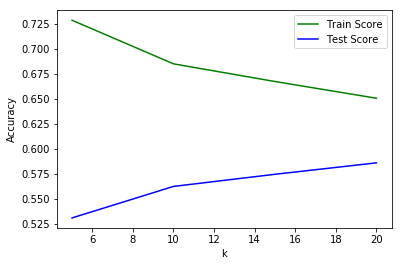

In [155]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

train_score_array = []
test_score_array = []
y =  [5, 10, 15, 20]

for k in y:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_P, y_train)
    train_score_array.append(knn.score(X_train_P, y_train))
    test_score_array.append(knn.score(X_test_P, y_test))

print('train:{}'.format(train_score_array))
print('test:{}'.format(test_score_array))

x_axis = y
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [156]:
knnreg = KNeighborsRegressor(10)
knnreg.fit(X_train_P, y_train)

print('K Nearest Neigbhor after PCA')
print('Training score: {:.2f}'.format(knnreg.score(X_train_P, y_train)))
print('Test score: {:.2f}'.format(knnreg.score(X_test_P, y_test)))

K Nearest Neigbhor after PCA
Training score: 0.69
Test score: 0.56


In [157]:
knn_pred = knnreg.predict(X_test_P)

### DECISION TREE

In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()

param = {'max_depth': [1,3,5,7,9,10]}

grid_search = GridSearchCV(regressor, param, cv = 5)
grid_search.fit(X_train_P, y_train)   

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.2f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'max_depth': 9}
The best train score:0.51


In [159]:
regressor = DecisionTreeRegressor(max_depth = 9)
regressor.fit(X_train_P, y_train)

print('Decision tree after PCA')
print('Training score: {:.2f}'.format(regressor.score(X_train_P, y_train)))
print('Test score: {:.2f}'.format(regressor.score(X_test_P, y_test)))

Decision tree after PCA
Training score: 0.75
Test score: 0.40


In [160]:
DT_pred = regressor.predict(X_test_P)

### RANDOM FOREST REGRESSOR

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RF_regressor = RandomForestRegressor()

param = {'max_depth': [1,3,5,7,9,10],'n_estimators' : [10,50,100]}

grid_search = GridSearchCV(RF_regressor, param, cv = 5)
grid_search.fit(X_train_P, y_train)   

print('The best hyperparameter value from grid search:{}'.format(grid_search.best_params_))
print('The best train score:{:.2f}'.format(grid_search.best_score_))

The best hyperparameter value from grid search:{'max_depth': 9, 'n_estimators': 100}
The best train score:0.62


In [162]:
RT_regressor = RandomForestRegressor(max_depth = 9,n_estimators = 100)
RT_regressor.fit(X_train_P, y_train)

print('Random Forest after PCA')
print('Training score: {:.2f}'.format(RT_regressor.score(X_train_P, y_train)))
print('Test score    : {:.2f}'.format(RT_regressor.score(X_test_P, y_test)))

Random Forest after PCA
Training score: 0.77
Test score    : 0.57


In [163]:
RT = RT_regressor.predict(X_test_P)

## INFERENCE

 PCA doesn't seem to help the regression models

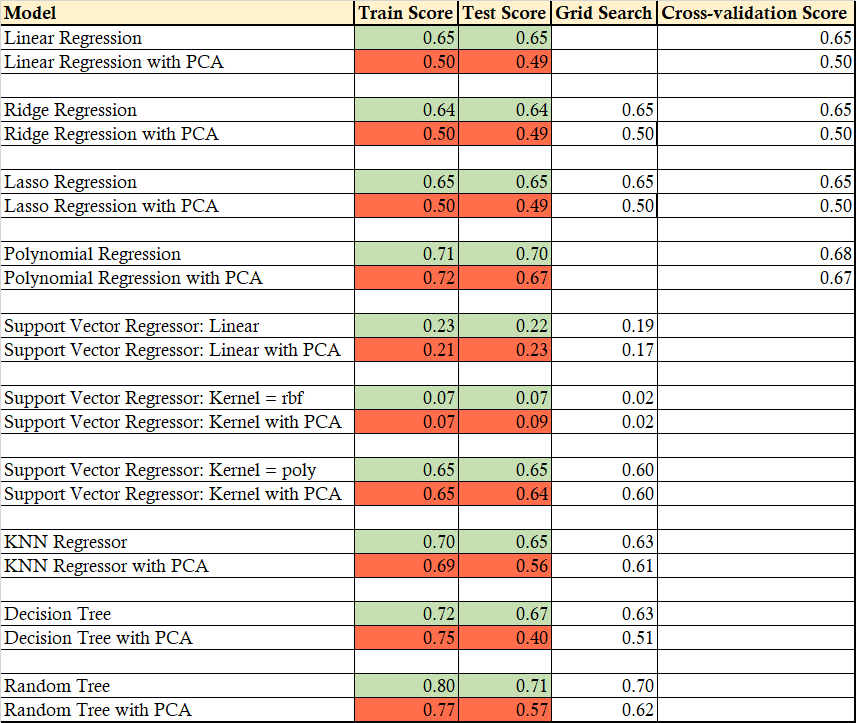

## DEEP LEARNING

## Model 1: Perceptron

In [179]:
!pip install keras

In [181]:
!pip install tensorflow

  Stored in directory: C:\Users\Abhi's\AppData\Local\pip\Cache\wheels\2c\b1\94\43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Stored in directory: C:\Users\Abhi's\AppData\Local\pip\Cache\wheels\a7\15\a0\0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc
  Stored in directory: C:\Users\Abhi's\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\Abhi's\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built opt-einsum absl-py gast termcolor
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0


In [369]:
print('X_train_scaled',X_train_scaled.shape)
print('X_test_scaled',X_test_scaled.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train_scaled (16924, 18)
X_test_scaled (4231, 18)
y_train (16924,)
y_test (4231,)


In [393]:
from keras import Sequential
from keras.layers import Dense

#model
Nmodel = Sequential()

#input layer
Nmodel.add(Dense(18, activation = 'relu',input_dim = X_train.shape[1]))

#hidden layer
Nmodel.add(Dense(9, kernel_initializer='normal', activation = 'relu' ))

#output layer
Nmodel.add(Dense(1, kernel_initializer='normal', activation='linear'))

#compile the model
Nmodel.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mae','accuracy'])

#fit
Nmodel.fit(X_train_scaled, y_train, epochs = 500, batch_size = 128)

Epoch 1/500
16924/16924 [==============================] - 0s 26us/step - loss: 538023.7131 - mae: 538023.8125 - accuracy: 0.0000e+00
Epoch 2/500
16924/16924 [==============================] - 0s 19us/step - loss: 538001.5046 - mae: 538001.5625 - accuracy: 0.0000e+00
Epoch 3/500
16924/16924 [==============================] - 0s 18us/step - loss: 537900.3234 - mae: 537900.5000 - accuracy: 0.0000e+00
Epoch 4/500
16924/16924 [==============================] - 0s 20us/step - loss: 537661.7992 - mae: 537661.7500 - accuracy: 0.0000e+00
Epoch 5/500
16924/16924 [==============================] - 0s 20us/step - loss: 537236.4637 - mae: 537236.5000 - accuracy: 0.0000e+00
Epoch 6/500
16924/16924 [==============================] - 0s 19us/step - loss: 536582.0867 - mae: 536582.1875 - accuracy: 0.0000e+00
Epoch 7/500
16924/16924 [==============================] - 0s 19us/step - loss: 535662.8524 - mae: 535662.8750 - accuracy: 0.0000e+00
Epoch 8/500
16924/16924 [==============================] - 0s 

16924/16924 [==============================] - 0s 19us/step - loss: 156058.1059 - mae: 156058.1094 - accuracy: 0.0000e+00
Epoch 122/500
16924/16924 [==============================] - 0s 20us/step - loss: 155715.6319 - mae: 155715.6719 - accuracy: 0.0000e+00
Epoch 123/500
16924/16924 [==============================] - 0s 20us/step - loss: 155397.4927 - mae: 155397.5312 - accuracy: 0.0000e+00 0s - loss: 153470.1072 - mae: 153470.1094 - accuracy: 
Epoch 124/500
16924/16924 [==============================] - 0s 20us/step - loss: 155091.2292 - mae: 155091.2344 - accuracy: 5.9088e-05
Epoch 125/500
16924/16924 [==============================] - 0s 19us/step - loss: 154794.6214 - mae: 154794.6094 - accuracy: 0.0000e+00
Epoch 126/500
16924/16924 [==============================] - 0s 19us/step - loss: 154508.5825 - mae: 154508.6406 - accuracy: 0.0000e+00
Epoch 127/500
16924/16924 [==============================] - 0s 22us/step - loss: 154234.7343 - mae: 154234.7344 - accuracy: 0.0000e+00 0s - lo

16924/16924 [==============================] - 0s 20us/step - loss: 146860.7024 - mae: 146860.6875 - accuracy: 5.9088e-05
Epoch 181/500
16924/16924 [==============================] - 0s 19us/step - loss: 146766.7759 - mae: 146766.7344 - accuracy: 0.0000e+00
Epoch 182/500
16924/16924 [==============================] - 0s 19us/step - loss: 146675.7597 - mae: 146675.7656 - accuracy: 0.0000e+00
Epoch 183/500
16924/16924 [==============================] - 0s 22us/step - loss: 146585.7676 - mae: 146585.7969 - accuracy: 0.0000e+00
Epoch 184/500
16924/16924 [==============================] - 0s 19us/step - loss: 146492.3749 - mae: 146492.3594 - accuracy: 5.9088e-05
Epoch 185/500
16924/16924 [==============================] - 0s 22us/step - loss: 146401.9675 - mae: 146401.9688 - accuracy: 0.0000e+00
Epoch 186/500
16924/16924 [==============================] - 0s 19us/step - loss: 146312.2935 - mae: 146312.2969 - accuracy: 0.0000e+00
Epoch 187/500
16924/16924 [==============================] - 0

16924/16924 [==============================] - 0s 16us/step - loss: 140768.7848 - mae: 140768.7969 - accuracy: 0.0000e+00
Epoch 299/500
16924/16924 [==============================] - 0s 17us/step - loss: 140755.2404 - mae: 140755.2500 - accuracy: 0.0000e+00
Epoch 300/500
16924/16924 [==============================] - 0s 17us/step - loss: 140731.7817 - mae: 140731.8125 - accuracy: 0.0000e+00
Epoch 301/500
16924/16924 [==============================] - 0s 18us/step - loss: 140714.5248 - mae: 140714.5469 - accuracy: 0.0000e+00
Epoch 302/500
16924/16924 [==============================] - 0s 17us/step - loss: 140699.7793 - mae: 140699.7656 - accuracy: 0.0000e+00
Epoch 303/500
16924/16924 [==============================] - 0s 17us/step - loss: 140679.2721 - mae: 140679.2500 - accuracy: 0.0000e+00
Epoch 304/500
16924/16924 [==============================] - 0s 18us/step - loss: 140664.5456 - mae: 140664.5156 - accuracy: 0.0000e+00
Epoch 305/500
16924/16924 [==============================] - 0

16924/16924 [==============================] - 0s 17us/step - loss: 139410.8594 - mae: 139410.8281 - accuracy: 0.0000e+00
Epoch 419/500
16924/16924 [==============================] - 0s 16us/step - loss: 139404.0950 - mae: 139404.0781 - accuracy: 0.0000e+00
Epoch 420/500
16924/16924 [==============================] - 0s 17us/step - loss: 139398.5274 - mae: 139398.5312 - accuracy: 0.0000e+00
Epoch 421/500
16924/16924 [==============================] - 0s 17us/step - loss: 139390.6611 - mae: 139390.6719 - accuracy: 0.0000e+00
Epoch 422/500
16924/16924 [==============================] - 0s 16us/step - loss: 139384.5788 - mae: 139384.5625 - accuracy: 0.0000e+00
Epoch 423/500
16924/16924 [==============================] - 0s 17us/step - loss: 139377.9165 - mae: 139377.9062 - accuracy: 0.0000e+00
Epoch 424/500
16924/16924 [==============================] - 0s 17us/step - loss: 139371.5279 - mae: 139371.5312 - accuracy: 0.0000e+00
Epoch 425/500
16924/16924 [==============================] - 0

In [397]:
y_prednn = Nmodel.predict(X_test_scaled)
print('Accuracy: {:.2f}'.format(metrics.r2_score(y_test,y_prednn)))

Accuracy: 0.61


<IPython.core.display.Javascript object>


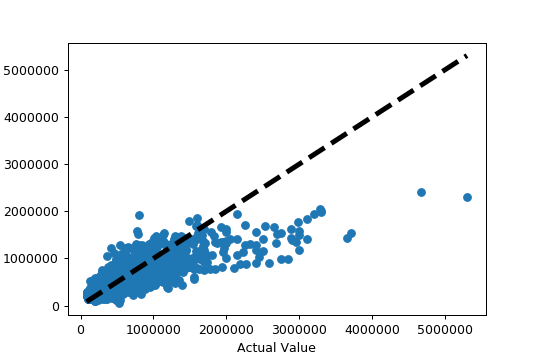

In [398]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_prednn)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
plt.show()

## RESULT

On comparison with the Deep Learning model, Polynomial Model was able to classify more efficiently with 72% accuracy.